# 卷积的概念

## 卷积的意义

1. 保留了图像的几何意义（位置信息）：卷积神经网络主要处理图像数据
2. 降低训练的参数的个数（参数个数决定运算量的大小）：共享参数模板

## 卷积的概念

1. 权重系数矩阵
    - 卷积核 convolved kernel

2. 对应的像素  * 对应的权重 ， 求和：
    - 卷积运算（操作）

3. 卷积操作的值：
    - 卷积特征

4. 卷积特征构成的图像
    - 卷积特征图像

# 卷积的数学模型 

- 图像中的卷积运算不是真正意义上卷积运算（卷积核旋转180的卷积运算）

# 卷积操作中的几个数据量

## 记号

- 卷积核的大小
    - K  kernel，卷积核的权重w，k

- 原始图像
    - 大小 O，值o，x

- 图像深度
    - 1，3，4
    - 图像像素表示
        - 32：8r，8g，8b，8a：图像深度为4， png
        - 24 ：8r，8g，8b，图像深度为3，jpg
        - 8：灰度图像，
    - 深度大小D,深度值 d    
        

- 卷积特征图像
    - N：n, y
    

- 卷积核的移动：
    大小：步长S（stride）

- 卷积特征图像的大小
    - O - K + 1

- 如果图像很大，
    - 依靠卷积核来降低图像的大小，比较局限。
    - 不依靠卷积操作来降低图像大小

- 池化pool（降低图像的大小）
    - 池化操作就是单一改变图像大小，又不与卷积存在关系。
    - 没有加权求和
        - 最大池化
        - 均值池化

- 怎么保证卷积前的图像与卷积后的图像的大小一样。
    - 补边Padding
    - 卷积核的大小是偶数，补边的数奇数。
    - 补边保持对称：卷积核一般取奇数（补边必须就是偶数，对称补边）
    
    - 卷积核的大小一般取：
        3， 5，7
        
    - 池化大小：
        - 2，4，8
        
    - 图像的预处理
        - 图像大小一般维2指数次方。
    - 一般建议步长取1。

# conv2d函数定义说明

```python

tf.nn.conv2d(
    input,                # 输入-原始图像（4-D：4维）：像素：格式使用data_format指定
    filter,                # 卷积核（4-D）：[filter_height：高度, filter_width：宽度, in_channels：深度：图像个数, out_channels：图像个数]：权重
    strides,              # 卷积插座的步长
    padding,            # 补边SAME，不补边VALID
    
    use_cudnn_on_gpu=True,
    data_format='NHWC',     #   [N：batch图像的个数，H：height高度，W：width宽度，C：channels图像深度] ，一般使用默认格式
    dilations=[1, 1, 1, 1],
    name=None
)
# 返回Tensor
```

- 图像的读写：
    - opencv 图像读写
    - matplotlib.pyplot图像读写
    - tf图像读写

(1, 604, 898, 1)


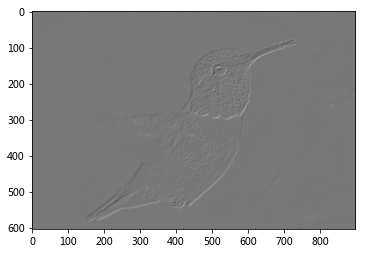

In [19]:
% matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 1. 读取图像
o_img = plt.imread('bird.png')

# (604, 898, 4) : 高度，宽度，深度
# print(o_img.shape)
# print(o_img)
# 2. 对图像进行卷积操作
# for h in   range(o_img.shape[0]):
#     for  w in range(o_img.shape[1]):
#         if w % 4 ==  0 :
#             # o_img[h, w, 3] = 0.2
#             o_img[h, w, 0] = 0
#             o_img[h, w, 1] = 0
#             o_img[h, w, 2] = 0

kernel =np.array(
    [
        [-2, -2,   0],
        [-2 , 0 ,  2],
        [  0,  2,  2]
    ]
)
    

# 数据格式化成conv2d要求的格式
# 被处理图像的格式
in_img = tf.placeholder(dtype=tf.float32, shape=(1, o_img.shape[0], o_img.shape[1], o_img.shape[2]))

# 卷积个格式化
in_kernel = np.zeros(dtype=np.float32, shape=( kernel.shape[0], kernel.shape[1], o_img.shape[2], 1))
for i in range(o_img.shape[2]):    # 把kernel预图像通道对应起来，一个通道一个kernel
    in_kernel[:, :, i, 0] = kernel

t_img = tf.nn.conv2d(
    input=in_img,
    filter=in_kernel,                # 这种参数自定转换为不变张量（constant）
    strides=[1, 1, 1, 1],
    padding='SAME'
)

# 执行，输入

session = tf.Session()
n_img = session.run(t_img, feed_dict={in_img: [o_img]})
print(n_img.shape)
# 3. 显示图像
plt.imshow(n_img[0, :, :, 0], cmap='gray')
plt.show()


(1, 602, 896, 1)


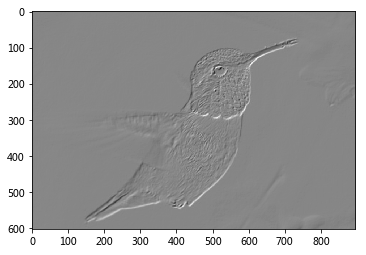

In [23]:
% matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 1. 读取图像
o_img = plt.imread('bird.png')

# (604, 898, 4) : 高度，宽度，深度
# print(o_img.shape)
# print(o_img)
# 2. 对图像进行卷积操作
# for h in   range(o_img.shape[0]):
#     for  w in range(o_img.shape[1]):
#         if w % 4 ==  0 :
#             # o_img[h, w, 3] = 0.2
#             o_img[h, w, 0] = 0
#             o_img[h, w, 1] = 0
#             o_img[h, w, 2] = 0

kernel =np.array(
    [
        [-2, -2,   0],
        [-2 , 0 ,  2],
        [  0,  2,  2]
    ]
)
    

# 数据格式化成conv2d要求的格式
# 被处理图像的格式
# in_img = tf.placeholder(dtype=tf.float32, shape=(1, o_img.shape[0], o_img.shape[1], o_img.shape[2]))
# oo = [o_img]    # 不会变成4维数组
in_img = np.zeros(dtype=np.float32, shape=(1, o_img.shape[0], o_img.shape[1], o_img.shape[2]))
in_img[0, :, :, :] = o_img

# 卷积个格式化
in_kernel = np.zeros(dtype=np.float32, shape=( kernel.shape[0], kernel.shape[1], o_img.shape[2], 1))
for i in range(o_img.shape[2]):    # 把kernel预图像通道对应起来，一个通道一个kernel
    in_kernel[:, :, i, 0] = kernel

t_img = tf.nn.conv2d(
    input=in_img,
    filter=in_kernel,                # 这种参数自定转换为不变张量（constant）
    strides=[1, 1, 1, 1],
    padding='VALID'
)

# 执行，输入

session = tf.Session()
n_img = session.run(t_img)
print(n_img.shape)
# 3. 显示图像
plt.imshow(n_img[0, :, :, 0] , cmap='gray')
plt.show()



# 深度神经网络的几个概念

- 前馈神经网络
    - 最后识别误差，向前层层传递。（前向传播Forward  Feedback）
    
    - 前馈神经网络包含：BP（Back Propagation)）
        - 全链接神经网络
            - 下一层的感知器（神经元），是有上一层所有感知器加权求和。

        - 卷积神经网络
            - 非全链接神经网络

# 卷积神经网络

- 思想
    - 分布两部分
        - 图像特征处理
            - 矩阵
            - $2^n$次方的图像矩阵，通过卷积与池化，变成多个只有一个像素点的矩阵。多个值得向量
            
            - 分成两层（泛指：卷积层）
                - 卷积运算层（降维：输入层）：激活函数
                - 池化层：没有激活函数
        - 分类训练
            - 全链接神经网络（向量）

- 经典的卷积神经网络
    - Le-Net5神经网络

In [26]:
im = plt.imread('./digits/test/TestImage_00001.bmp')
print(type(im))
print(im.shape)

<class 'numpy.ndarray'>
(28, 28)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [30]:
# Le-Net5网络模型
# 1. 定义张量（输入，卷积层（卷积，池化），全链接层）
#      1.1. 输入
x = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28, 1])
y = tf.placeholder(dtype=tf.float32, shape=[None, 10])    # 长度为10的向量来分类，那个分向量最大就属于哪类
#      1.2. 28(32)->28卷积->14池化：6
w_28_28_14 = tf.Variable(tf.random.normal(shape=(5, 5, 1, 6)))
b_28_28_14 = tf.Variable(tf.random.normal(shape=(6,)))
#      1.3. 14->10卷积->5池化：16
w_14_10_5 = tf.Variable(tf.random.normal(shape=(5, 5, 6, 16)))
b_14_10_5 = tf.Variable(tf.random.normal(shape=(16,)))
#      1.4. 5->1 (没有池化)：120
w_5_1 = tf.Variable(tf.random.normal(shape=(5, 5, 16, 120)))
b_5_1 = tf.Variable(tf.random.normal(shape=(120,)))
#      1.5. 4D数据  【reshape】 2-D数据(操作体现)
#      1.6. 120 ->84全链接
w_120_84 = tf.Variable(tf.random.normal(shape=(120, 84)))
b_120_84 = tf.Variable(tf.random.normal(shape=(84,)))
#      1.7. 84->10全链接
w_84_10 = tf.Variable(tf.random.normal(shape=(84, 10)))
b_84_10 = tf.Variable(tf.random.normal(shape=(10,)))


In [31]:
# 2. 定义操作（输入，卷积层，全链接层）

#      1.1. 输入(无)

#      1.2. 28(32)->28卷积->14池化：6
o_14 = tf.nn.conv2d(input=x, filter=w_28_28_14, strides=[1, 1, 1, 1], padding='SAME')   # 卷积
o_14 = tf.nn.bias_add(o_14, b_28_28_14)   # 偏置项计算
o_14 = tf.nn.relu(o_14)   # 激活函数

o_14 = tf.nn.avg_pool(value=o_14, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

#      1.3. 14->10卷积->5池化：16
o_5 = tf.nn.conv2d(input=o_14, filter=w_14_10_5, strides=[1, 1, 1, 1], padding='VALID')
o_5 = tf.nn.bias_add(o_5, b_14_10_5) 
o_5 = tf.nn.relu(o_5) 

o_5 = tf.nn.avg_pool(value=o_5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME' )

#      1.4. 5->1 (没有池化)：120
o_1 = tf.nn.conv2d(input=o_5, filter=w_5_1, strides=[1, 1, 1, 1], padding='VALID')
o_1 = tf.nn.bias_add(o_1, b_5_1) 
o_1 = tf.nn.relu(o_1) 

#      1.5. 4D数据  【reshape】 2-D数据(操作体现)
o  = tf.reshape(o_1, (-1,  120))
#      1.6. 120 ->84全链接
o_84 = tf.nn.bias_add(tf.matmul(o, w_120_84) , b_120_84)    # 加权求和，注意偏置项
o_84 = tf.nn.relu(o_84)    # 激活函数的处理

#      1.7. 84->10全链接
o_10 = tf.matmul(o_84, w_84_10) + b_84_10
# o_10 =  tf.nn.softmax(o_84)  

o_predict = tf.nn.sigmoid(o_10)
# o_predict = o_10

In [ ]:
# 3. 损失与损失最优模型

In [ ]:
# 4. 数据加载（对训练数据做预处理：大小：1-n：灰度处理，加噪音）

In [ ]:
# 5. 训练（变训练边测试：使用测试集输出误差）

In [ ]:
# 6. 评估（F1-Score，拟合度评估）